In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

from pprint import pprint
import os
import json
import itertools

from tqdm import tqdm
import numpy as np

from dpipe.config import get_resource_manager
from dpipe.medim.visualize import slice3d
from dpipe.medim.metrics import multichannel_dice_score

from sklearn.metrics import confusion_matrix

In [7]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm / cm.sum(axis=1, keepdims=True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    
    np.set_printoptions(precision=2)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [8]:
rm = get_resource_manager('/home/krivov/deep_pipe/config_examples/brats.deepmedic.config')

dataset = rm.dataset

RuntimeError: An exception occurred while building the resource dataset_wrapper:cached
    at 1:11 in file /home/krivov/deep_pipe/config_examples/assets/dataset/brats.config

In [ ]:
experiment_path = '/home/krivov/new_exp/brats_tnet_downsample/experiment_0/'

predictions_path = os.path.join(experiment_path, 'test_segm_pred_prob')
msegm_path = os.path.join(experiment_path, 'test_msegm_pred')


patients = [p.replace('.npy', '') for p in os.listdir(predictions_path)]

[0.90341205148322723, 0.32835038027799635, 0.71658925598107093]


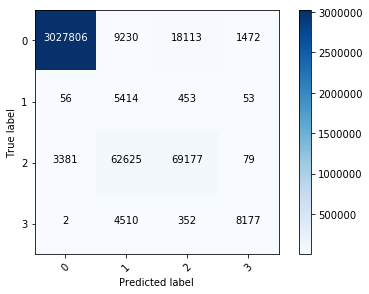

In [5]:
patient = patients[6]

mscan = dataset.load_mscan(patient)
segm_pred = np.load(os.path.join(predictions_path, patient + '.npy'))
msegm_pred = np.load(os.path.join(msegm_path, patient + '.npy'))

segm_true = dataset.load_segm(patient)
msegm_true = dataset.load_msegm(patient)

print(multichannel_dice_score(msegm_pred, msegm_true))

cm = confusion_matrix(segm_true.flatten(),
                      np.argmax(segm_pred, axis=0).flatten())

#cm[0, 0] = 0

plot_confusion_matrix(cm, normalize=False, classes=np.unique(segm_true))

msegm_pred[:, 0, 0, [0, -1]] = 0, 1
msegm_true[:, 0, 0, [0, -1]] = 0, 1
segm_pred[:, 0, 0, [0, -1]] = 0, 1

In [6]:
slice3d(*mscan,
        ~np.any(msegm_true, axis=0), *msegm_true,
        ~np.any(msegm_pred, axis=0), *msegm_pred, *segm_pred, max_columns=4)

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=138), Output()), _dom_classes=('widget-interact',))

In [7]:
slices = [slice(None)] + [slice(1, -1, 9)] * 3

mscan_d = mscan[slices]
segm_pred_d = segm_pred[slices]
msegm_true_d = msegm_true[slices]
msegm_pred_d = msegm_pred[slices]

In [8]:
mscan.shape

(4, 132, 175, 139)

In [9]:
slice3d(*mscan_d,
        ~np.any(msegm_true_d, axis=0), *msegm_true_d,
        ~np.any(msegm_pred_d, axis=0), *msegm_pred_d, *segm_pred_d, max_columns=4)

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=15), Output()), _dom_classes=('widget-interact',))

In [8]:
p = patients[0]

In [9]:
p.replace('.npy', '')

'Brats17_TCIA_167_1'

In [4]:
slice3d(*x, ~y.any(axis=0), *y, max_columns=4)

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=131), Output()), _dom_classes=('widget-interact',))